# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Mental-Health-In-Tech-Companies </div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
df=pd.read_csv("N:\EXCEL\Tech.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Data Analysing & Preprocessing:

In [4]:
df.size

33993

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [7]:
df.drop(['Timestamp','state','comments','Country'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [9]:
df=df.dropna(subset=['self_employed', 'work_interfere'])

In [10]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [11]:
df.duplicated().sum()

3

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

# Exploratory Data Analysis:

In [122]:
# since gender has too many duplicate values , replacing the names of gender into three categories

In [123]:
df['Age'].value_counts()

Age
 32             65
 29             60
 26             60
 28             54
 34             53
 30             52
 33             51
 27             50
 31             47
 25             46
 35             43
 23             39
 37             33
 24             32
 36             32
 38             31
 40             29
 39             25
 43             20
 41             18
 42             16
 22             15
 21             14
 45             11
 46             11
 44              8
 19              6
 18              5
 20              5
 48              5
 56              4
 49              4
 50              4
 51              4
 54              3
 55              3
 57              3
 11              1
 8               1
 53              1
-1               1
 72              1
 61              1
 62              1
-1726            1
 47              1
 58              1
 99999999999     1
 329             1
 60              1
Name: count, dtype: int64

In [124]:
#replacing the extreme values in age with mode
df['Age'].mode()

0    32
Name: Age, dtype: int64

In [125]:
df['Age']=df['Age'].replace([99999999999,-29,329,-1726,-1],[32,32,32,32,32],inplace = False)

<Axes: xlabel='Age', ylabel='Density'>

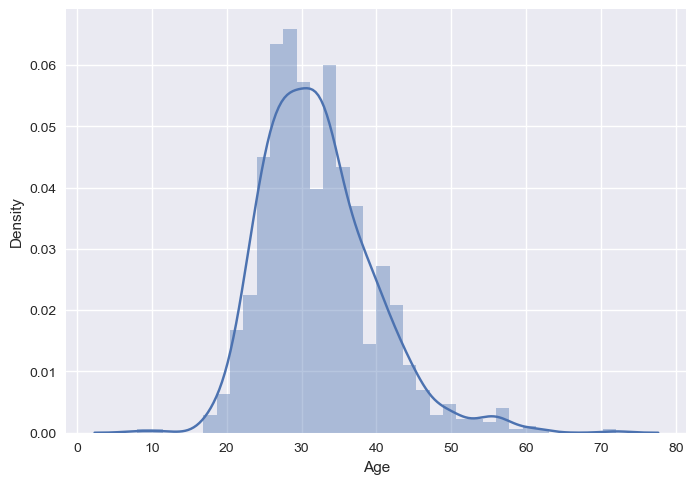

In [126]:
sn.distplot(df['Age'])

From the above plot we can say that Age is now distributed normally ,before it was totatlly left skewed. As the outliers are removed the distribution looks perfect for further processing.

In [127]:
df.Gender.unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'f', 'Mal',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah', 'All',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [128]:
# since gender has too many duplicate values ,replacing the names of gender into three categories
df['Gender']=df['Gender'].replace(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'f', 'Mal',
       'queer/she/they', 'non-binary', 'woman', 'Make', 'Nah', 'All',
       'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'],['male','male','female','female','male','male','transgender','transgender',
  'transgender','female','transgender','female','male','transgender','transgender','female','male','transgender','transgender','transgender','transgender',
  'transgender','female','transgender','transgender','male','male','transgender','transgender','transgender','transgender',
  'transgender','transgender','transgender','transgender','female','transgender','transgender','male','transgender','female','female','transgender',
 'male'],inplace=False)

In [129]:
df.Gender.unique()

array(['male', 'female', 'transgender'], dtype=object)

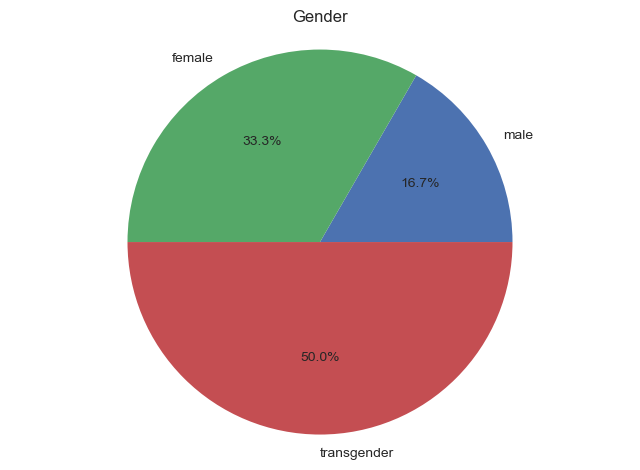

In [130]:
List = ['male', 'female', 'transgender']
Values = [1, 2, 3]

plt.pie(Values, labels=List, autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')
plt.show()

In [131]:
df.work_interfere.value_counts()

work_interfere
Sometimes    458
Never        207
Rarely       168
Often        141
Name: count, dtype: int64

In [132]:
#A significant number of people in the dataset have faced or currently face mental health issues, as indicated by their responses related to work interference.
valid = ['Sometimes', 'Never ','Rarely ','Often']

df['issue'] = df['work_interfere'].isin(valid).map({True: 'Yes', False: 'No'})
print(df['issue'].unique())

['Yes' 'No']


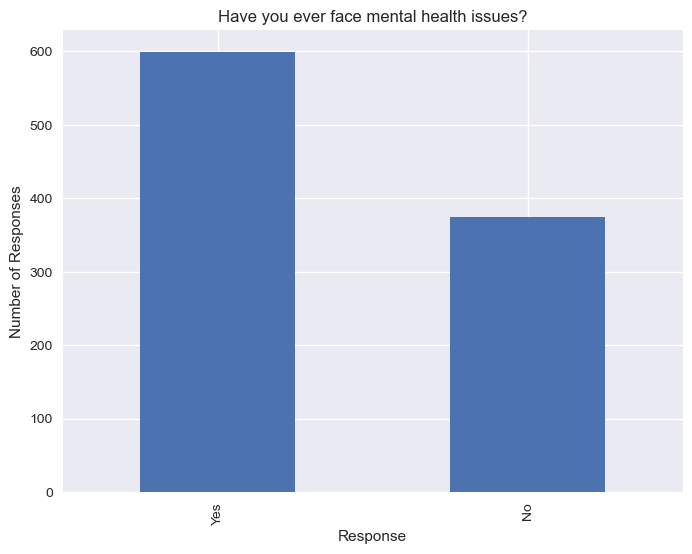

In [133]:
plt.title("Have you ever face mental health issues?")
ax = df['issue'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.show()

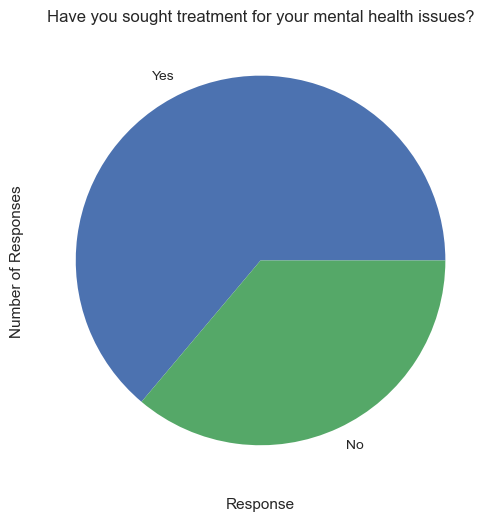

In [134]:
plt.title("Have you sought treatment for your mental health issues?")
ax = df['treatment'].value_counts()
ax.plot.pie(figsize=(8,6))
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.show()

yes_count = df['treatment'].value_counts()['Yes']
no_count = df['treatment'].value_counts()['No']


# Does the nature of work affect the way people face and deal with their mental health?
Lets see how the nature of work affects the way employees respond to mental health issues. We divide this into three catgeories

.Self-Employment

.Remote-work

.Organization Size

In [135]:
df.self_employed.value_counts()

self_employed
No     850
Yes    124
Name: count, dtype: int64

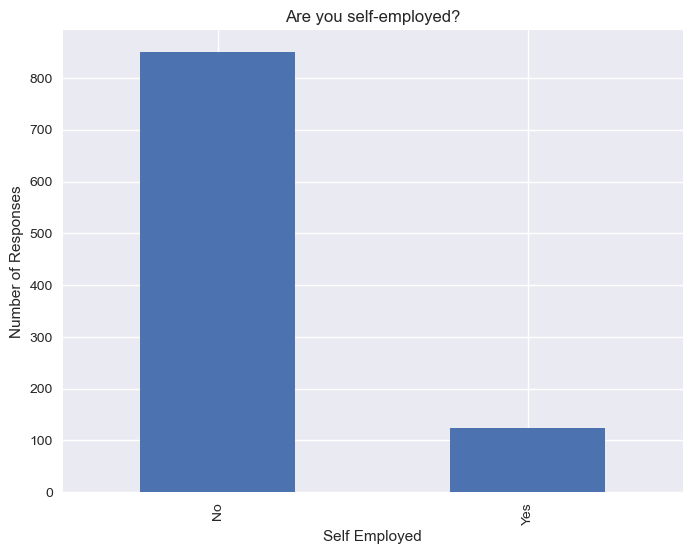

Not self-employed:  850
Self-employed:  124


In [136]:
plt.title("Are you self-employed?")
ax = df['self_employed'].value_counts()
ax.plot.bar(figsize=(8,6))#pie(autopct="%.1f%%")
plt.xlabel("Self Employed")
plt.ylabel("Number of Responses")
plt.show()

no = df['self_employed'].value_counts()[0]
yes = df['self_employed'].value_counts()[1]

print("Not self-employed: ", no)
print("Self-employed: ", yes)


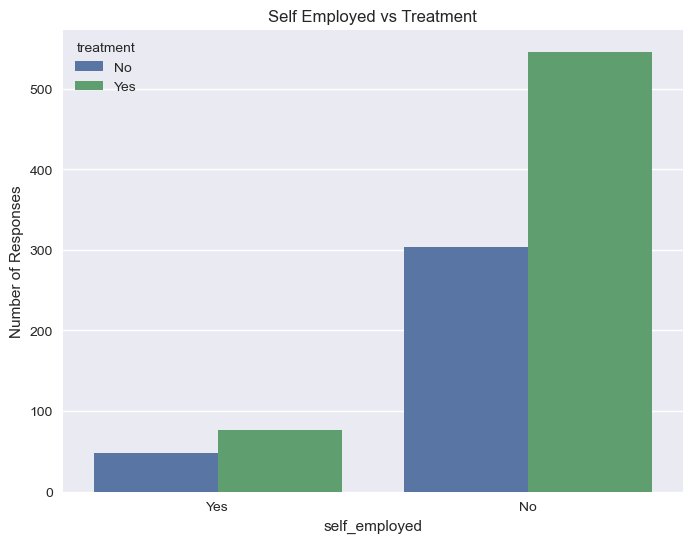

In [137]:
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'self_employed',ax=ax ,hue= 'treatment')
plt.title('Self Employed vs Treatment')
plt.ylabel("Number of Responses")
plt.show()

Being self employed or not does not affect the prevalence or response to mental health concerns. Both the groups, self-employed or not, are equally likely to face mental health concerns and to seek treatment for them.

In [138]:
# Organization Size

In [139]:
company_sizes = df['no_employees'].unique()
print(company_sizes)

['1-5' '100-500' '26-100' 'More than 1000' '6-25' '500-1000']


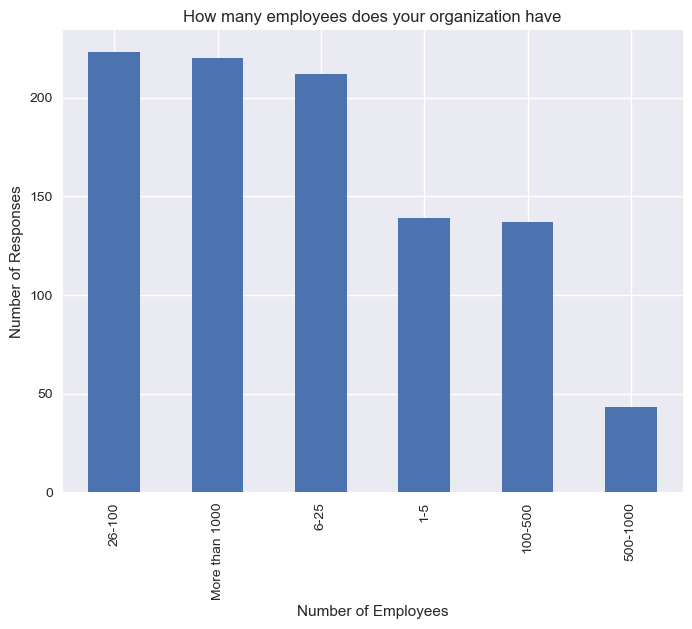

In [140]:
plt.title("How many employees does your organization have")
ax = df['no_employees'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Number of Employees")
plt.ylabel("Number of Responses")
plt.show()

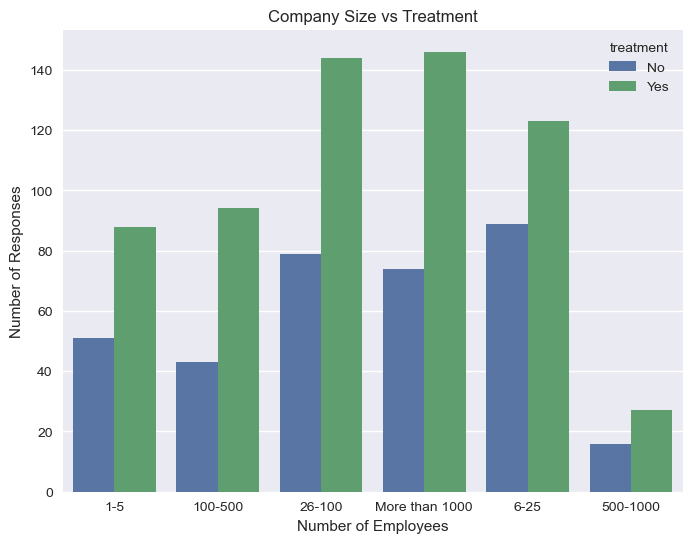

In [141]:
fig, ax =plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'no_employees',hue= 'treatment')
plt.title('Company Size vs Treatment')
plt.xlabel("Number of Employees")
plt.ylabel("Number of Responses")
plt.show()

In [237]:
df.benefits.value_counts()

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

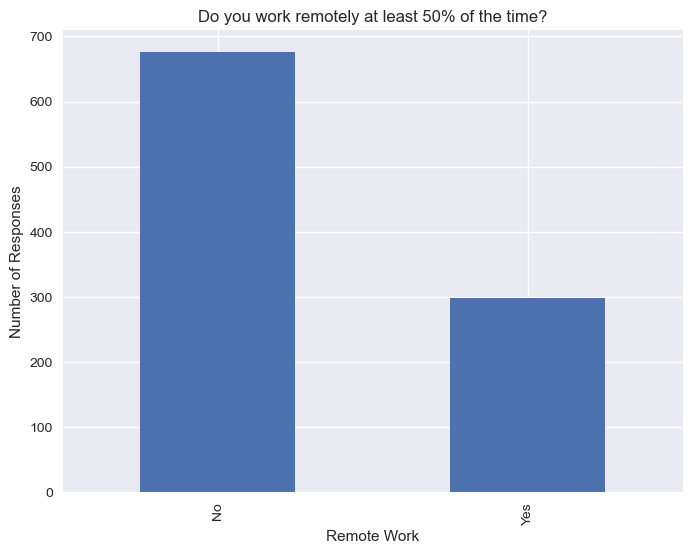

In [142]:
plt.title("Do you work remotely at least 50% of the time?")
ax = df['remote_work'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Remote Work")
plt.ylabel("Number of Responses")
plt.show()

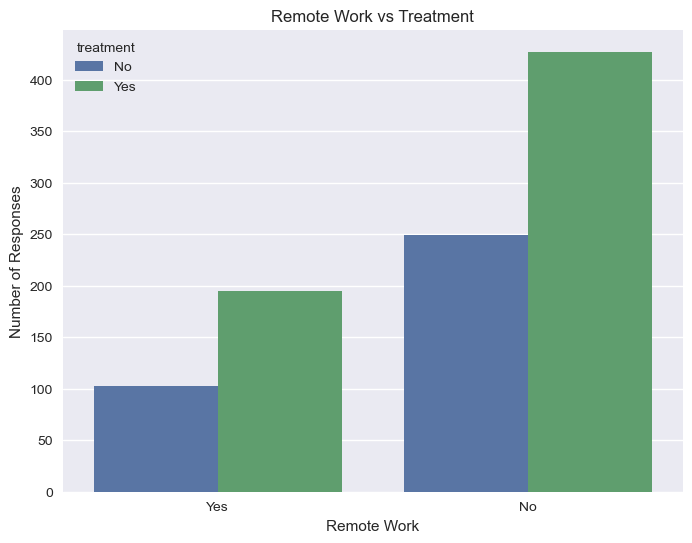

In [143]:
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'remote_work',ax=ax,hue= 'treatment')
plt.title('Remote Work vs Treatment')
plt.xlabel("Remote Work")
plt.ylabel("Number of Responses")
plt.show()


Therefore, the employee responses indicate that working remotely also has little to no impact on the prevalence of mental health issues in tech-employees and their response in the form of seeking treatment to it.

In [144]:
mentalCount = (df['mental_health_interview'].value_counts()/len(df))*100
print("Responses regarding mental health issues")
np.round(mentalCount, decimals=1)

Responses regarding mental health issues


mental_health_interview
No       82.0
Maybe    14.7
Yes       3.3
Name: count, dtype: float64

By looking at the above responses we cannot conclude whether the employers takes mental health as seriously as physical health, because majority of the people are uncertian about the question and they did not Know whether the employer takes mental health issues as serioulsy as physical health issues. One reason why so many people were uncertian could be that majority were uncertian about the health benefits provided by their employer or there was just some lack of awareness about mental health issues.

When questioned whether employees would talk to their potential employers about their mental health issues close to 82.0% of the people responded with a no, only 3.3% of the people stated that they will talk about their mental health issues in an interview and about 14.7% were uncertain of their decision.



In [145]:
physicalCount = (df['phys_health_interview'].value_counts()/len(df))*100
print("Responses regarding physical health issues")
np.round(physicalCount, decimals=1)

Responses regarding physical health issues


phys_health_interview
Maybe    44.8
No       39.7
Yes      15.5
Name: count, dtype: float64

When questioned whether employees would talk to their potential employers about their physical health issues 39.7% of the people responded with a no, only 15.5% of the people stated that they will talk about their physical health issues in an interview and 44.8% were uncertain of their decision.

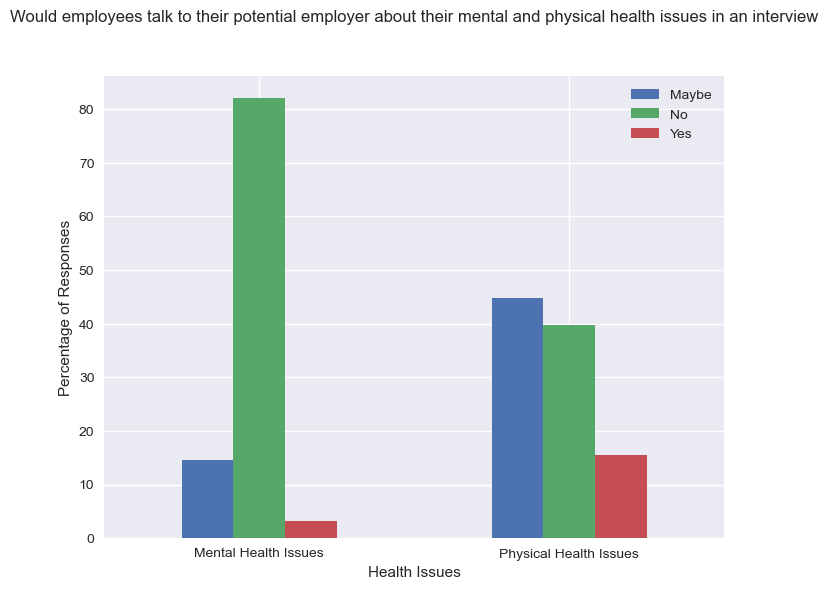

In [146]:
newdf = pd.DataFrame({'Mental Health Issues':mentalCount,'Physical Health Issues':physicalCount}).T
barplot = newdf.plot.bar(rot=0, figsize=(8,6))
barplot.set(ylabel='Percentage of Responses', xlabel='Health Issues')
plt.title('Would employees talk to their potential employer about their mental and physical health issues in an interview',y=1.1)
plt.show()

Looking at the number of responses and the bar graph above we can conclude that employees in genral are not comfortable talking about their mental and physical health issues with an employer in an interview. Despite this we can see that more people are unwilling to share about their mental health issues than talking about their physical healt issues in an interview. This shows that either companies, or employees do not take mental health issues as seriously as physical health issues. One reason for employees not talking openly about their mental health issues could be that they might feel that the employer would not hire them if they talked about their mental health issues, regardless of wether the employee took mental health seriously or not and this reason can be termed as an important confounding factor which can influence our conclusions.

In [147]:
mentalCount = (df['mental_health_consequence'].value_counts()/len(df))*100
print("Responses regarding mental health issues")
np.round(mentalCount, decimals=1)

Responses regarding mental health issues


mental_health_consequence
Maybe    38.6
No       35.1
Yes      26.3
Name: count, dtype: float64

These results suggest that employees feel hesitant and insecure about discussing mental health issues.

o The large “Maybe” group (38.6%) indicates uncertainty and a lack of clarity about employer support.

o A significant portion (26.3%) fears negative repercussions, which shows lingering stigma or distrust around mental health conversations in the workplace.

o Overall, employees do not feel fully safe or confident addressing mental health concerns with their employer.

In [148]:
physicalCount = (df['phys_health_consequence'].value_counts()/len(df))*100
print("Responses regarding physical health issues")
np.round(physicalCount, decimals=1)

Responses regarding physical health issues


phys_health_consequence
No       71.7
Maybe    22.6
Yes       5.7
Name: count, dtype: float64

Employees feel much more comfortable discussing physical health issues.

o A very large majority (71.7%) believe physical health disclosures are safe and acceptable.

o Only a small number (5.7%) fear negative outcomes.

o This shows that physical health concerns are far more normalized in the workplace.

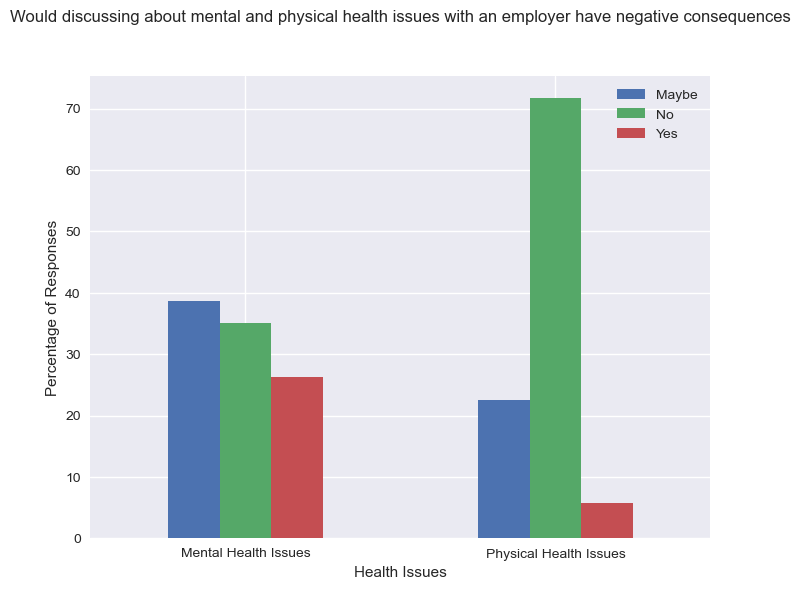

In [149]:
newdf = pd.DataFrame({'Mental Health Issues':mentalCount,'Physical Health Issues':physicalCount}).T
barplot = newdf.plot.bar(rot=0, figsize=(8,6))
barplot.set(ylabel='Percentage of Responses', xlabel='Health Issues')
plt.title('Would discussing about mental and physical health issues with an employer have negative consequences',y=1.1)
plt.show()

In [150]:
df.phys_health_consequence.value_counts()

phys_health_consequence
No       698
Maybe    220
Yes       56
Name: count, dtype: int64

In [151]:
df.mental_health_consequence.value_counts()

mental_health_consequence
Maybe    376
No       342
Yes      256
Name: count, dtype: int64

o Far more people believe physical health issues will not lead to negative consequences (698) compared to mental health issues (342).


o Many more people believe mental health issues will have negative consequences (256) compared to physical health issues (56).


So the statement that employees feel less comfortable discussing mental health issues and perceive higher risk is fully supported by the data shown in the image.

In [152]:
result = df['mental_vs_physical'].value_counts()
print("Responses regarding whether employers takes mental health as seriouly as physical health")
result

Responses regarding whether employers takes mental health as seriouly as physical health


mental_vs_physical
Don't know    428
No            280
Yes           266
Name: count, dtype: int64

When questioned whether employers took mental health as seriouly as physical health problems, 266 people responded with a yes, 280 people responded with a no, whereas 428 people were not sure whether their employer took mental health as seriously as physical health.

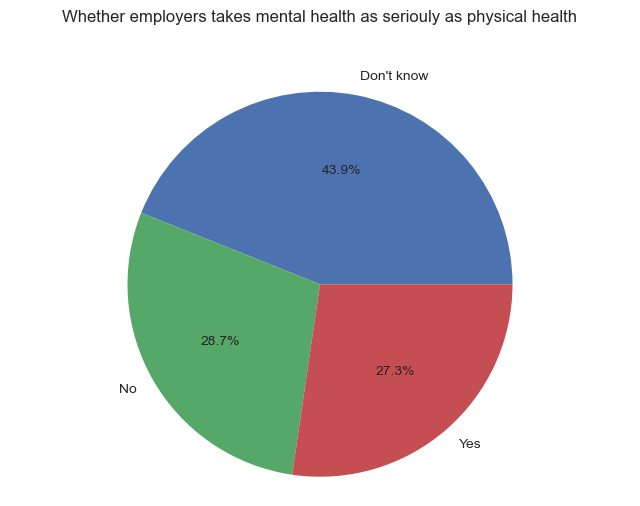

In [153]:
result.plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.axis('equal')
plt.title("Whether employers takes mental health as seriouly as physical health", y=1.1)
plt.show()

To find the reason behind this huge percent of uncertanity among the employees we will see that how many people know the options an employer provides for mental health issues

In [154]:
careoptions = df['care_options'].value_counts()
careoptions

care_options
Yes         386
No          363
Not sure    225
Name: count, dtype: int64

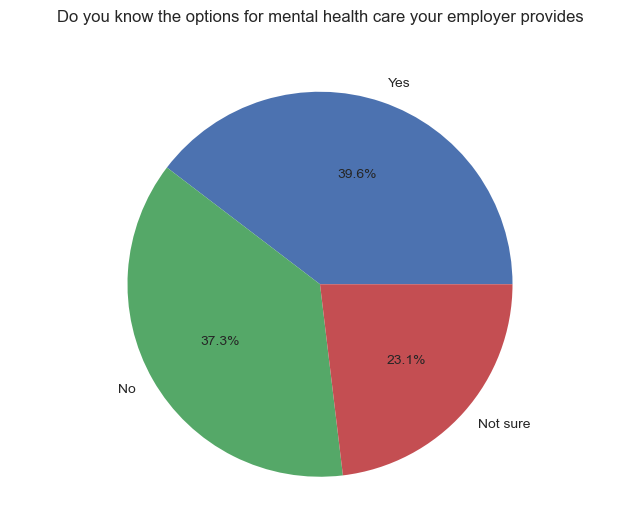

In [155]:
careoptions.plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.axis('equal')
plt.title("Do you know the options for mental health care your employer provides", y=1.1)
plt.show()

The reason why so many people said Don't Know when they were asked whether an employer treated mental health issues as seriouly as physical health issues was because about 39.6 percent of people did not know about the options for mental health care their employer provided and 23.1 percent were not sure.

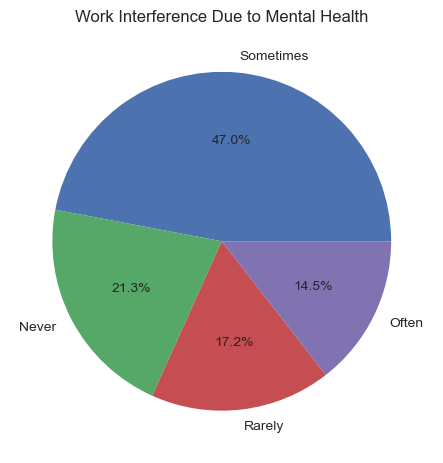

In [156]:
ax = df['work_interfere'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('Work Interference Due to Mental Health')
plt.ylabel('')
plt.show()

Most of the employees responded that sometimes they do feel that mental health issues interfere with their work. Often and Sometimes add up to around 61.5% whereas Never and Rarely add up to around 40.5%

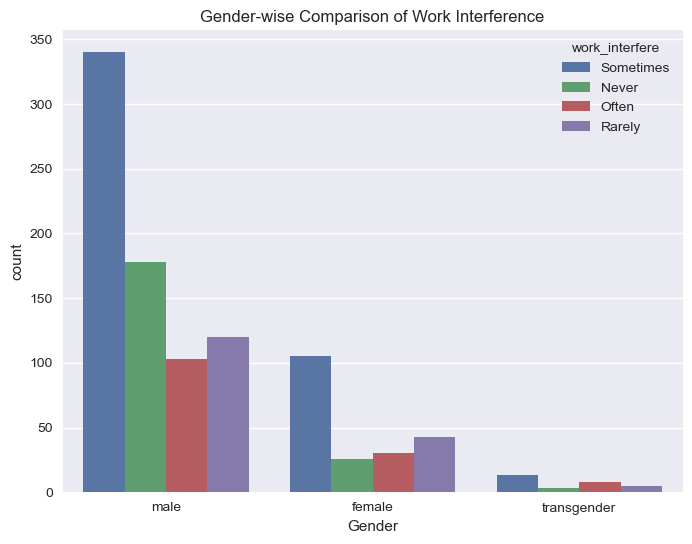

In [157]:
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'Gender',ax=ax,hue= 'work_interfere')
plt.title("Gender-wise Comparison of Work Interference")
plt.show()


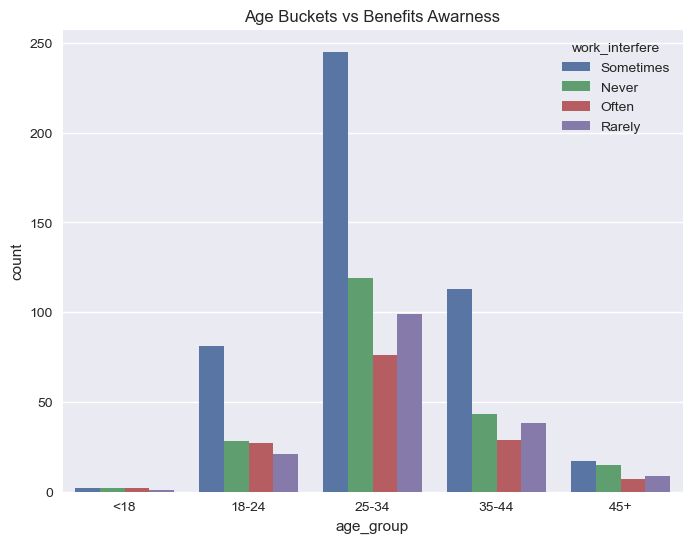

In [158]:
df['age_group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

fig,ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'age_group',hue= 'work_interfere',ax=ax)
plt.title('Age Buckets vs Benefits Awarness')
plt.show()

In [159]:
df.supervisor.value_counts()

supervisor
Yes             375
No              313
Some of them    286
Name: count, dtype: int64

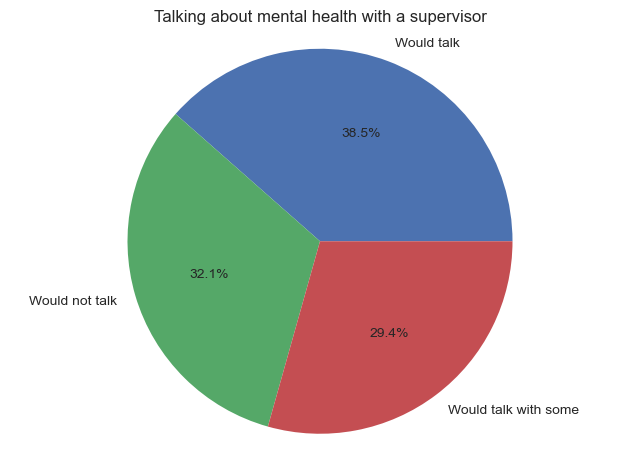

In [160]:
Yes = df['supervisor'].value_counts()[0]
No = df['supervisor'].value_counts()[1]
Some = df['supervisor'].value_counts()[2]
List = [Yes, No, Some]
Labels = ['Would talk', 'Would not talk', 'Would talk with some']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Talking about mental health with a supervisor')
plt.axis('equal')
plt.show()

In [161]:
df.coworkers.value_counts()

coworkers
Some of them    601
No              202
Yes             171
Name: count, dtype: int64

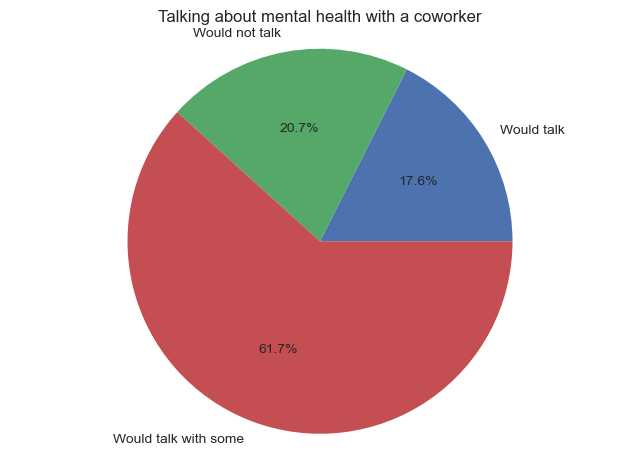

In [162]:
Yes =df['coworkers'].value_counts()[2]
No = df['coworkers'].value_counts()[1]
Some =df['coworkers'].value_counts()[0]
List = [Yes, No, Some]
Labels = ['Would talk', 'Would not talk', 'Would talk with some']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Talking about mental health with a coworker')
plt.axis('equal')
plt.show()

In [163]:
df.mental_health_consequence.value_counts()

mental_health_consequence
Maybe    376
No       342
Yes      256
Name: count, dtype: int64

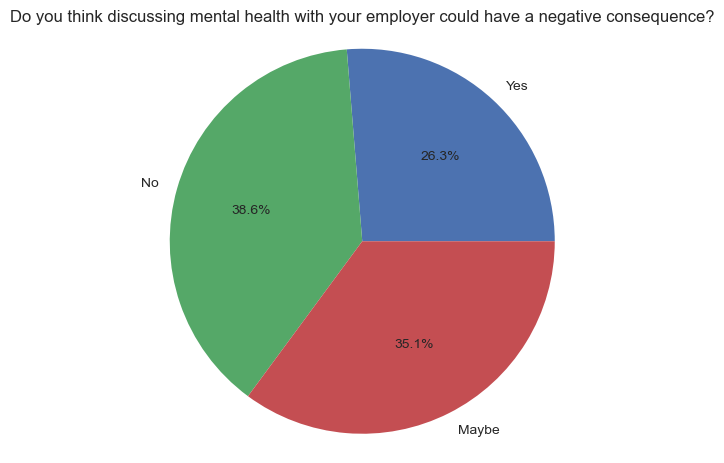

In [164]:
Yes = df['mental_health_consequence'].value_counts()[2]
No = df['mental_health_consequence'].value_counts()[0]
Maybe = df['mental_health_consequence'].value_counts()[1]
List = [Yes, No, Maybe]
Labels = ['Yes', 'No', 'Maybe']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Do you think discussing mental health with your employer could have a negative consequence?')
plt.axis('equal')
plt.show()

In [165]:
df.obs_consequence.value_counts()

obs_consequence
No     810
Yes    164
Name: count, dtype: int64

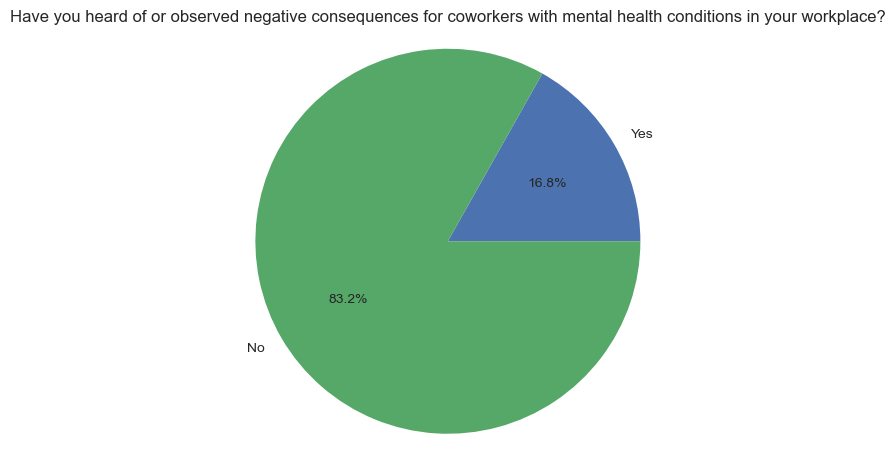

In [166]:
Yes = df['obs_consequence'].value_counts()[1]
No = df['obs_consequence'].value_counts()[0]

List = [Yes, No]
Labels = ['Yes', 'No']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')
plt.axis('equal')
plt.show()

In [14]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [15]:
df.wellness_program.value_counts()

wellness_program
No            649
Yes           194
Don't know    131
Name: count, dtype: int64

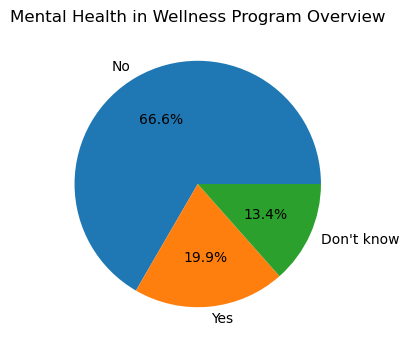

In [21]:
ax = df['wellness_program'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Mental Health in Wellness Program Overview')
plt.ylabel('')
plt.show()

Clearly, a large majority of companies/employers either do not discuss mental health as part of the Wellness Program or employees do not know about it.

In [22]:
df.benefits.value_counts()

benefits
Yes           399
No            288
Don't know    287
Name: count, dtype: int64

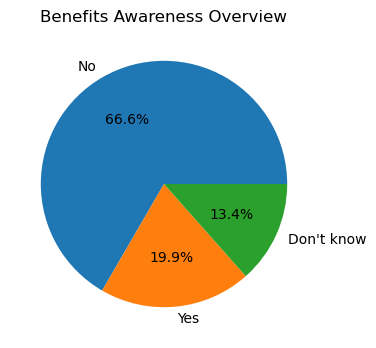

In [23]:
ax = df['wellness_program'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Benefits Awareness Overview')
plt.ylabel('')
plt.show()

In [17]:
df.seek_help.value_counts()

seek_help
No            498
Don't know    266
Yes           210
Name: count, dtype: int64

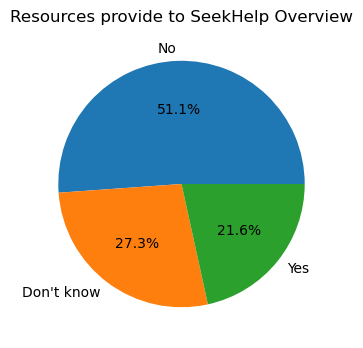

In [18]:
ax = df['seek_help'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Resources provide to SeekHelp Overview')
plt.ylabel('')
plt.show()

Once again, employees who responded with 'Yes' are the fewest in number. Most said that their employer does not provide resources to seek help.

In [19]:
df.anonymity.value_counts()

anonymity
Don't know    623
Yes           299
No             52
Name: count, dtype: int64

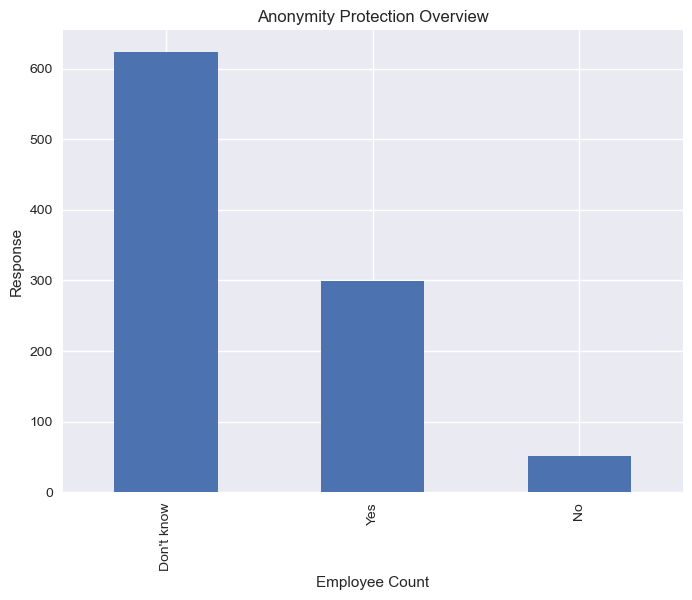

In [168]:
plt.title("Anonymity Protection Overview")
ax = df['anonymity'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Employee Count")
plt.ylabel("Response")
plt.show()

This is an interesting result! Majority of the employees answered this with Don't Know which can also show that most of them did not take advantage of mental health or substance abuse treatment resources. It could also show that employees might not be comfortable with pursuing substance abuse treatment.

anonymity
Yes    299
No      52
Name: count, dtype: int64


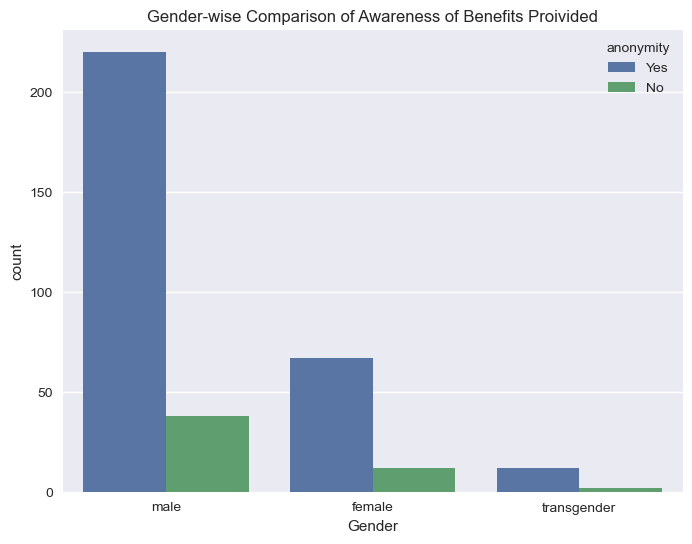

In [169]:
data = df[(df['anonymity'] == 'Yes') | (df['anonymity'] == 'No')]['anonymity'].value_counts()
print(data)

data2 = df[(df['anonymity'] == 'Yes') | (df['anonymity'] == 'No')]
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=data2,x = 'Gender',hue= 'anonymity',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

# Leave

In [24]:
df.leave.value_counts()

leave
Don't know            412
Somewhat easy         209
Very easy             156
Somewhat difficult    107
Very difficult         90
Name: count, dtype: int64

In [ ]:
valid = ['Don't know', 'Somewhat easy ','Very easy ','Somewhat difficult','Very difficult']

df['issue'] = df['leave'].isin(valid).map({True: 'Yes', False: 'No'})
print(df['issue'].unique())

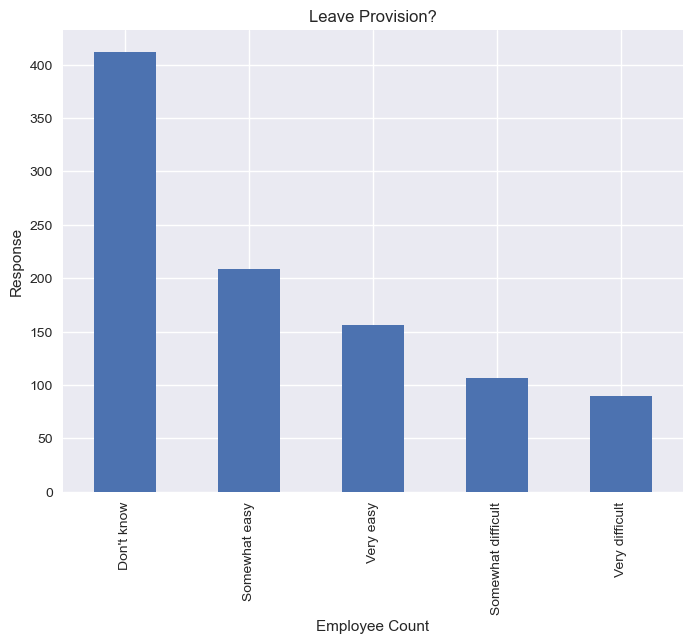

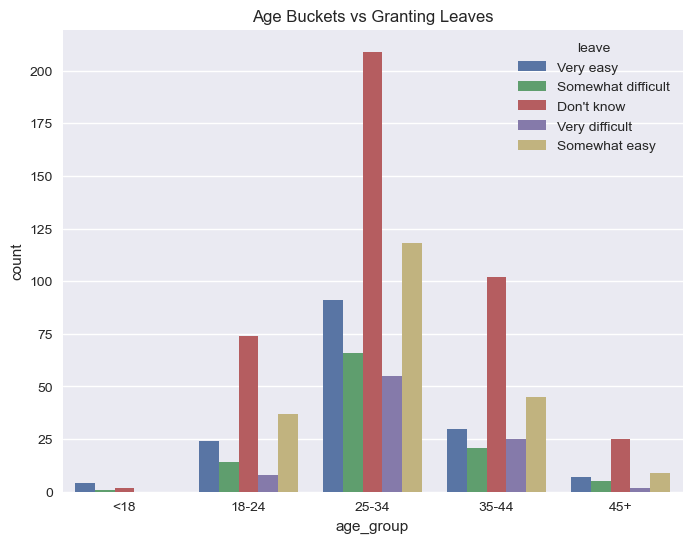

In [170]:
plt.title("Leave Provision?")
ax = df['leave'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Employee Count")
plt.ylabel("Response")
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'age_group',hue= 'leave',ax=ax)
plt.title('Age Buckets vs Granting Leaves')
plt.show()


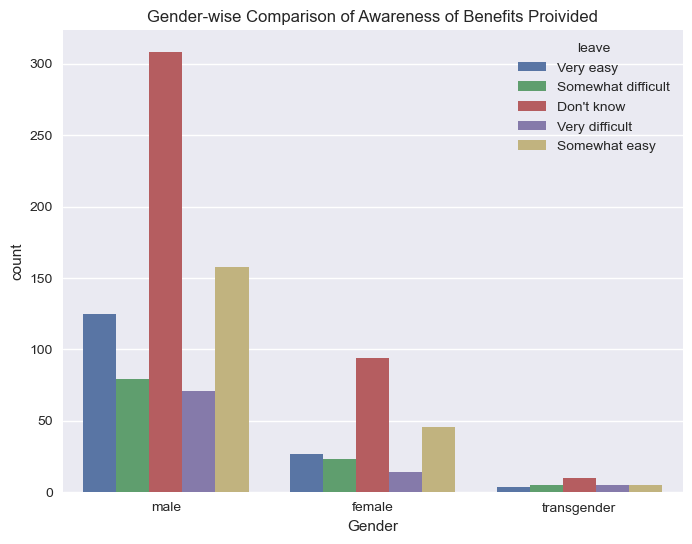

In [171]:
leave_gen = df.groupby(['Gender'])['leave']
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=df,x = 'Gender',hue= 'leave',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

The highest results were for the option 'Dont Know' which can indicate that the employee did not ask for a leave for mental health issues and does not know about the company's response. Apart from that, we see across all ages and genders, it was 'very easy' to 'somewhat easy' for employees to get leave due to mental health issues

family_history
No     534
Yes    440
Name: count, dtype: int64


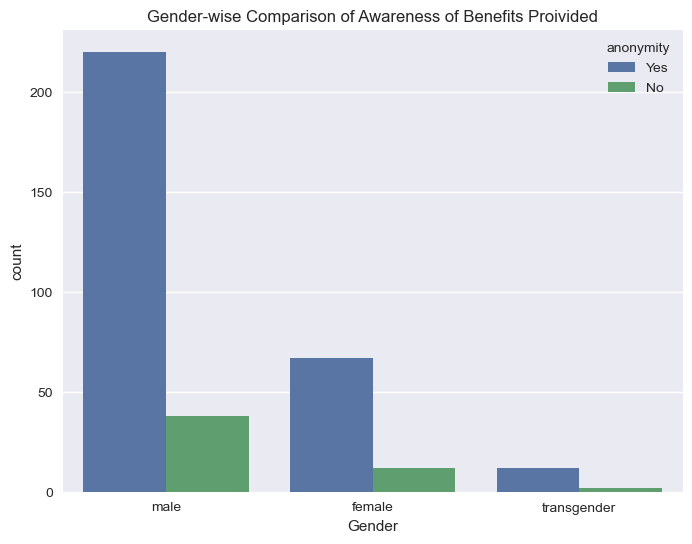

In [172]:
data = df[(df['family_history'] == 'Yes') | (df['family_history'] == 'No')]['family_history'].value_counts()
print(data)

data2 = df[(df['anonymity'] == 'Yes') | (df['anonymity'] == 'No')]
fig, ax = plt.subplots(figsize=(8,6))
sn.countplot(data=data2,x = 'Gender',hue= 'anonymity',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

<Axes: ylabel='Age'>

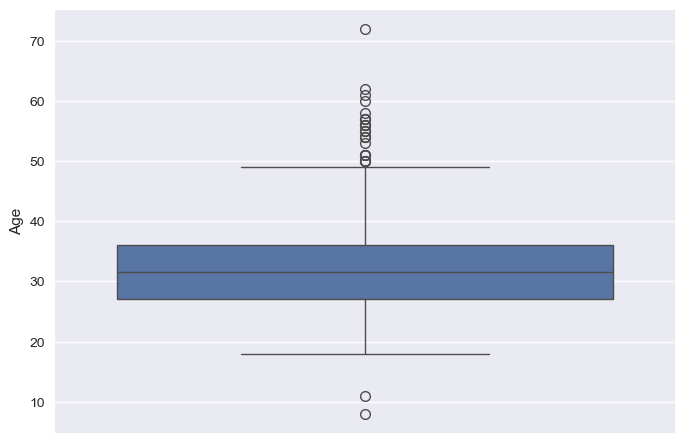

In [173]:
sn.boxplot(y=df['Age'])

In [174]:
# Dropping outliers from the 'age' column using IQR method
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
lower_limit = df['Age'].quantile(0.25) - (1.5 * IQR)
upper_limit = df['Age'].quantile(0.75) + (1.5 * IQR)

outliers_data = np.where(df['Age'] > upper_limit, True,
                         np.where(df['Age'] < lower_limit, True, False))

data_trimmed = df.loc[~(outliers_data)] 

<Axes: ylabel='Age'>

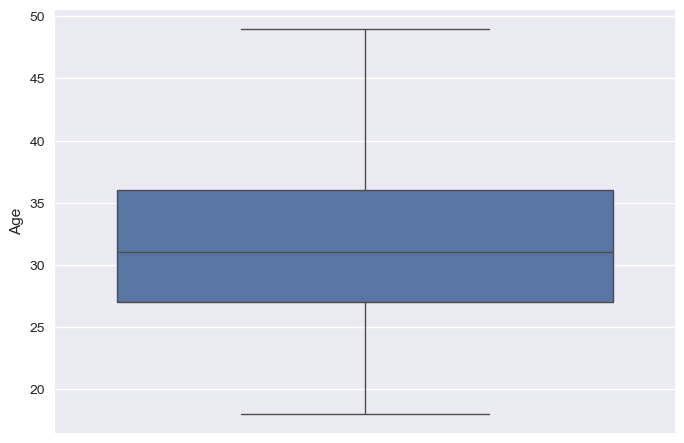

In [175]:
sn.boxplot(data_trimmed['Age'])

# Conclusions

This marks an end to our exploratory data analysis. Throughout the process, we looked into the prevalence of mental health issues in tech companies and the response of both the employees and employers by discussing each goal identified at the beginning separately. We then visualized the responses obtained from the survey and identified factors that could influence them. Finally, we also formed insightful inferences that helped offer possible reasonings to the responses that were obtained.


In [176]:
df.dtypes

Age                             int64
Gender                         object
self_employed                  object
family_history                 object
treatment                      object
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence                object
issue                          object
age_group                    category
dtype: object

In [177]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'issue', 'age_group'],
      dtype='object')

In [178]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
a={'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'issue', 'age_group'}
for i in a:
    df[i]=l.fit_transform(df[i])

In [179]:
x=df.drop(['treatment'],axis=1)
x

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,issue,age_group
18,46,1,1,1,3,0,1,1,2,1,...,1,1,2,2,1,2,2,1,1,3
20,29,1,0,1,3,1,0,1,2,2,...,0,1,1,1,1,1,1,0,1,1
21,31,1,1,0,0,0,1,1,1,0,...,1,1,1,1,1,0,2,0,0,1
22,46,1,0,0,1,2,1,1,2,2,...,0,1,1,2,1,0,1,0,1,3
23,41,1,0,0,0,5,0,0,0,0,...,0,1,0,0,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,1,0,1,3,1,1,1,2,2,...,2,1,1,0,1,0,1,0,1,1
1253,36,1,0,1,2,5,0,0,0,0,...,0,0,1,1,1,1,0,0,0,2
1255,32,1,0,1,1,2,1,1,2,2,...,1,1,1,2,1,1,2,0,1,1
1256,34,1,0,1,3,5,0,1,2,2,...,2,2,0,0,1,1,1,0,1,1


In [180]:
y=df['treatment']
y

18      0
20      1
21      0
22      1
23      1
       ..
1252    1
1253    0
1255    1
1256    1
1258    1
Name: treatment, Length: 974, dtype: int32

# Scaling using MinMaxScaler

In [181]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)
x_scaled

array([[0.59375 , 0.5     , 1.      , ..., 1.      , 1.      , 0.75    ],
       [0.328125, 0.5     , 0.      , ..., 0.      , 1.      , 0.25    ],
       [0.359375, 0.5     , 1.      , ..., 0.      , 0.      , 0.25    ],
       ...,
       [0.375   , 0.5     , 0.      , ..., 0.      , 1.      , 0.25    ],
       [0.40625 , 0.5     , 0.      , ..., 0.      , 1.      , 0.25    ],
       [0.265625, 0.5     , 0.      , ..., 0.      , 1.      , 0.      ]])

# Splitting data for training and testing

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [183]:
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(293, 24) (293,)
(681, 24) (681,)


# Model Creation with using Default parameter

In [184]:
k = KNeighborsClassifier(n_neighbors=5)
s = SVC(kernel='rbf')
d = DecisionTreeClassifier(criterion='entropy')
r = RandomForestClassifier(random_state=1)
a = AdaBoostClassifier()
ml = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gr = GradientBoostingClassifier()
lists = []
l= [k, s,d, r, a, ml, gr]
lists = []
for i in l:
    print(i)
    i.fit(x_train, y_train)
    y_pred =i.predict(x_test)
    lists.append(accuracy_score(y_test, y_pred) * 100)
    print(classification_report(y_test, y_pred))


KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       114
           1       0.72      0.88      0.79       179

    accuracy                           0.72       293
   macro avg       0.72      0.67      0.67       293
weighted avg       0.72      0.72      0.70       293

SVC()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.61      1.00      0.76       179

    accuracy                           0.61       293
   macro avg       0.31      0.50      0.38       293
weighted avg       0.37      0.61      0.46       293

DecisionTreeClassifier(criterion='entropy')
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       114
           1       0.74      0.79      0.76       179

    accuracy                           0.70       293
   macro avg       0.68      0.67      0.68       293
w

In [185]:
data = pd.DataFrame(
    lists,
    index=['KNN','SVC','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['Default Parameter']
)
data

,Default Parameter
KNN,71.672355
SVC,61.092150
DecisionTree,69.965870
RandomForest,74.744027
Adaboost,75.767918
XGB,72.696246
Gradient,72.013652


# Hyperparameter tuning


In [186]:
from sklearn.model_selection import GridSearchCV


In [187]:
# KNeighbors
#p = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#clf = GridSearchCV(k, p, cv=5, scoring='accuracy')
#clf.fit(x_train, y_train)
#print(clf.best_params_)


In [188]:
# SVC
#p = {'kernel': ['Linear', 'poly', 'rbf']}
#clf = GridSearchCV(s, p, cv=5, scoring='accuracy')
#clf.fit(x_train, y_train)
#print(clf.best_params_)


In [189]:
# DecisionTree
#p = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6], 'random_state': [1, 2, 3, 4, 5]}
#clf = GridSearchCV(d, p, cv=5, scoring='accuracy')
#clf.fit(x_train, y_train)
#print(clf.best_params_)

In [190]:
#Randomforesst
#p={'n_estimators':[100,150,200],'max_depth':[1,2,3,4,5],'random_state':[1,2,3,4,5]}
#clf=GridSearchCV(r,p,cv=5,scoring='accuracy')
#clf.fit(x_train,y_train)
#print(clf.best_params_)

In [191]:
#AdaBoost
#p={'n_estimators':[100,150,200],'random_state':[1,2,3,4,5]}
#clf=GridSearchCV(a,p,cv=5,scoring='accuracy')
#clf.fit(x_train,y_train)
#print(clf.best_params_)

In [192]:
#gradient
#p={'n_estimators':[100,150,200],'max_depth':[1,2,3,4,5],'random_state':[1,2,3,4,5]}
#clf=GridSearchCV(gr,p,cv=5,scoring='accuracy')
#clf.fit(x_train,y_train)
#print(clf.best_params_)

In [193]:
# XGB
#p={'n_estimators':[100,150,200], 'max_depth':[1,2,3,4,5], 'random_state':[1,2,3,4,5]}
#clf=GridSearchCV(ml,p,cv=5,scoring='accuracy')
#clf.fit(x_train,y_train)
#print(clf.best_params_)

# Model creation using hyperparameter tuning

In [194]:
k1=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s1=SVC(kernel='rbf')
d1=DecisionTreeClassifier(max_depth=6,random_state=5,criterion='entropy')
r1=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a1=AdaBoostClassifier(n_estimators=100,random_state=1)
x1=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr1=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists1=[]
l1=[k1,s1,d1,r1,a1,x1,gr1]
for i in l1:
	print(i)
	i.fit(x_train,y_train)
	y_pred1=i.predict(x_test)
	lists1.append(accuracy_score(y_test,y_pred1)*100)
    #print(classification_report(y_test,y_pred1))

KNeighborsClassifier(n_neighbors=9, weights='distance')
SVC()
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5)
RandomForestClassifier(max_depth=5, random_state=4)
AdaBoostClassifier(n_estimators=100, random_state=1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Gra

In [195]:
data1= pd.DataFrame(
    lists1,
    index=['KNN','SVC','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['Hyperparameter']
)
data1

,Hyperparameter
KNN,74.061433
SVC,61.092150
DecisionTree,70.989761
RandomForest,76.109215
Adaboost,73.720137
XGB,72.013652
Gradient,71.672355


# Oversampling

increase the number of minority samples in the dataset

In [196]:
o= SMOTE(random_state=1)
x_os, y_os = o.fit_resample(x, y)


In [197]:
y.value_counts()

treatment
1    622
0    352
Name: count, dtype: int64

In [198]:
y_os.value_counts()

treatment
0    622
1    622
Name: count, dtype: int64

In [199]:
from sklearn.preprocessing import StandardScaler
m = StandardScaler()         # set up scaler
x_os = m.fit_transform(x_os) # apply scaler
x_os

array([[ 1.88369267,  0.40081386,  2.85430531, ...,  2.55722387,
         0.95134305,  2.37534329],
       [-0.4224514 ,  0.40081386, -0.35034794, ..., -0.39104906,
         0.95134305, -0.21102612],
       [-0.15114033,  0.40081386,  2.85430531, ..., -0.39104906,
        -1.05114554, -0.21102612],
       ...,
       [-0.15114033,  0.40081386, -0.35034794, ..., -0.39104906,
         0.95134305, -0.21102612],
       [-0.96507353,  0.40081386, -0.35034794, ..., -0.39104906,
        -1.05114554, -1.50421083],
       [ 1.47672607,  0.40081386, -0.35034794, ..., -0.39104906,
         0.95134305,  1.08215859]])

In [200]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [201]:
k_o=KNeighborsClassifier(n_neighbors=3)
s_o=SVC(kernel='rbf')
g_o=GaussianNB()
d_o=DecisionTreeClassifier(criterion='entropy')
r_o=RandomForestClassifier(random_state=1)
a_o=AdaBoostClassifier()
ml_o=XGBClassifier()
gr_o=GradientBoostingClassifier()
lists2=[]
l_o=[k_o,s_o,g_o,d_o,r_o,a_o,ml_o,gr_o]
for i in l_o:
	print(i)
	i.fit(x_train1,y_train1)
	y_pred_o=i.predict(x_test1)
	lists2.append(accuracy_score(y_test1,y_pred_o)*100)

KNeighborsClassifier(n_neighbors=3)
SVC()
GaussianNB()
DecisionTreeClassifier(criterion='entropy')
RandomForestClassifier(random_state=1)
AdaBoostClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
GradientBoostingClassifier()


In [202]:
data2= pd.DataFrame(
    lists2,
    index=['KNN','SVC','NB','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['OverSampling']
)
data2

,OverSampling
KNN,76.203209
SVC,77.807487
NB,75.401070
DecisionTree,75.401070
RandomForest,81.016043
Adaboost,75.668449
XGB,78.609626
Gradient,79.144385


#OverSampling with hypermarameter

In [203]:
k2=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s2=SVC(kernel='rbf')
d2=DecisionTreeClassifier(max_depth=6,random_state=5,criterion='entropy')
r2=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a2=AdaBoostClassifier(n_estimators=100,random_state=1)
ml2=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr2=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists3=[]
l2=[k2,s2,d2,r2,a2,ml2,gr2]
for i in l2:
	print(i)
	i.fit(x_train1,y_train1)
	y_pred2=i.predict(x_test1)
	lists3.append(accuracy_score(y_test1,y_pred2)*100)

KNeighborsClassifier(n_neighbors=9, weights='distance')
SVC()
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5)
RandomForestClassifier(max_depth=5, random_state=4)
AdaBoostClassifier(n_estimators=100, random_state=1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Gra

In [204]:
data3= pd.DataFrame(
    lists3,
    index=['KNN','SVC','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['OverSampling-hyperparameter']
)
data3

,OverSampling-hyperparameter
KNN,77.272727
SVC,77.807487
DecisionTree,75.935829
RandomForest,76.203209
Adaboost,76.470588
XGB,78.074866
Gradient,78.074866


# Undersampling

decrease the number of majority samples in the dataset


In [205]:
from imblearn.under_sampling import RandomUnderSampler

u = RandomUnderSampler(random_state=1)
X_us, y_us = u.fit_resample(x, y)


In [206]:
y.value_counts()

treatment
1    622
0    352
Name: count, dtype: int64

In [207]:
y_us.value_counts()

treatment
0    352
1    352
Name: count, dtype: int64

In [208]:
x_u=m.fit_transform(X_us)
x_u

array([[ 1.82862389,  0.36762425,  2.79284801, ...,  2.37518619,
         0.87683763,  2.27403641],
       [-0.15232279,  0.36762425,  2.79284801, ..., -0.42101963,
        -1.14046201, -0.22350124],
       [ 0.64005588,  0.36762425, -0.35805744, ..., -0.42101963,
         0.87683763,  1.02526758],
       ...,
       [-1.07676458, -1.96397458, -0.35805744, ..., -0.42101963,
         0.87683763, -1.47227006],
       [ 0.64005588,  0.36762425,  2.79284801, ..., -0.42101963,
         0.87683763,  1.02526758],
       [-0.15232279,  0.36762425, -0.35805744, ..., -0.42101963,
         0.87683763, -0.22350124]])

In [209]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_u,y_us,test_size=0.3,random_state=1)

In [210]:
k_u=KNeighborsClassifier(n_neighbors=3)
s_u=SVC(kernel='rbf')
g_u=GaussianNB()
d_u=DecisionTreeClassifier(criterion='entropy')
r_u=RandomForestClassifier(random_state=1)
a_u=AdaBoostClassifier()
ml_u=XGBClassifier()
gr_u=GradientBoostingClassifier()
lists4=[]
l_u=[k_u,s_u,g_u,d_u,r_u,a_u,ml_u,gr_u]
for i in l_u:
	print(i)
	i.fit(x_train2,y_train2)
	y_pred_u=i.predict(x_test2)
	lists4.append(accuracy_score(y_test2,y_pred_u)*100)

KNeighborsClassifier(n_neighbors=3)
SVC()
GaussianNB()
DecisionTreeClassifier(criterion='entropy')
RandomForestClassifier(random_state=1)
AdaBoostClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
GradientBoostingClassifier()


In [211]:
data4= pd.DataFrame(
    lists4,
    index=['KNN','SVC','NB','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['UnderSampling']
)
data4

,UnderSampling
KNN,61.320755
SVC,72.641509
NB,75.943396
DecisionTree,62.264151
RandomForest,73.584906
Adaboost,73.113208
XGB,69.811321
Gradient,71.698113


#OverSampling with hypermarameter

In [212]:
k2=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
s2=SVC(kernel='rbf')
d2=DecisionTreeClassifier(max_depth=6,random_state=5,criterion='entropy')
r2=RandomForestClassifier(random_state=4,n_estimators=100,max_depth=5)
a2=AdaBoostClassifier(n_estimators=100,random_state=1)
ml2=XGBClassifier(random_state=1,n_estimators=100,max_depth=3)
gr2=GradientBoostingClassifier(max_depth=5,n_estimators=100,random_state=2)
lists5=[]
l2=[k2,s2,d2,r2,a2,ml2,gr2]
for i in l2:
	print(i)
	i.fit(x_train1,y_train1)
	y_pred2=i.predict(x_test1)
	lists5.append(accuracy_score(y_test1,y_pred2)*100)

KNeighborsClassifier(n_neighbors=9, weights='distance')
SVC()
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5)
RandomForestClassifier(max_depth=5, random_state=4)
AdaBoostClassifier(n_estimators=100, random_state=1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Gra

In [213]:
data5= pd.DataFrame(
    lists5,
    index=['KNN','SVC','DecisionTree','RandomForest','Adaboost','XGB','Gradient'],
    columns=['undersampling-hyperparameter']
)
data5

,undersampling-hyperparameter
KNN,77.272727
SVC,77.807487
DecisionTree,75.935829
RandomForest,76.203209
Adaboost,76.470588
XGB,78.074866
Gradient,78.074866


In [214]:
datas = pd.concat([data, data1, data2, data3, data4, data5], axis=1)
datas

,Default Parameter,Hyperparameter,OverSampling,OverSampling-hyperparameter,UnderSampling,undersampling-hyperparameter
KNN,71.672355,74.061433,76.203209,77.272727,61.320755,77.272727
SVC,61.092150,61.092150,77.807487,77.807487,72.641509,77.807487
DecisionTree,69.965870,70.989761,75.401070,75.935829,62.264151,75.935829
RandomForest,74.744027,76.109215,81.016043,76.203209,73.584906,76.203209
Adaboost,75.767918,73.720137,75.668449,76.470588,73.113208,76.470588
XGB,72.696246,72.013652,78.609626,78.074866,69.811321,78.074866
Gradient,72.013652,71.672355,79.144385,78.074866,71.698113,78.074866
NB,NaN,NaN,75.401070,NaN,75.943396,NaN


Here the best algorithm is Randomforesclassifier using oversampling with using default parameters.it give 80% accuracy.so we select the model for deploy

0.809997712194006
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       186
           1       0.79      0.84      0.82       188

    accuracy                           0.81       374
   macro avg       0.81      0.81      0.81       374
weighted avg       0.81      0.81      0.81       374



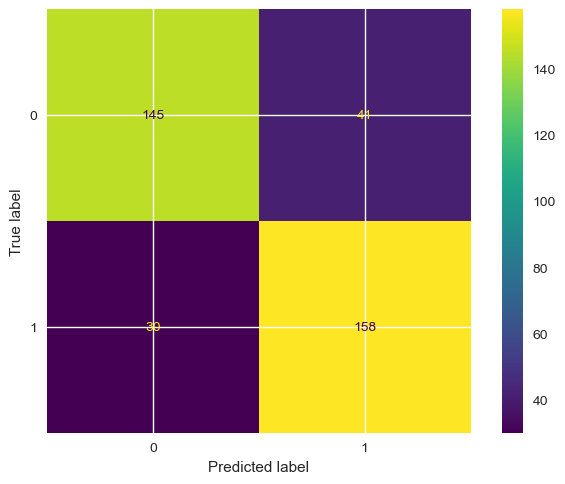

In [215]:
ra=RandomForestClassifier(random_state=1)
ra.fit(x_train1,y_train1)
y_pred_r=ra.predict(x_test1)
accur_score=roc_auc_score(y_test1, y_pred_r)
print(accur_score)
print(classification_report(y_test1,y_pred_r))
print(ConfusionMatrixDisplay.from_predictions(y_test1,y_pred_r))

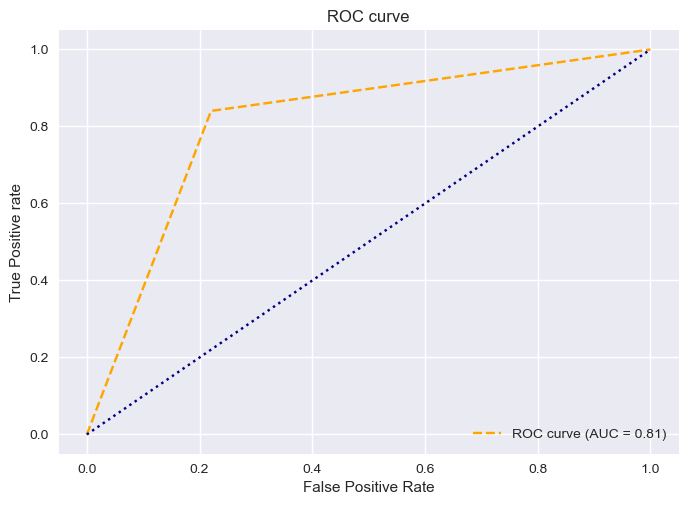

In [216]:
# roc curve for model
fpr, tpr, thresh = roc_curve(y_test1, y_pred_r)
# plot roc curves
plt.style.use('seaborn-v0_8')
plt.plot(fpr, tpr, linestyle='--', color='orange', label='ROC curve (AUC = %0.2f)' % accur_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Model Deploy

In [217]:
#import pickle
#pickle.dump(ra,open('ra_model','wb'))  #model obj
#pickle.dump(mms,open('max_model','wb')) # scalar obj
#pickle.dump(l,open('l_encoder','wb'))  #encoding obj

# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">END</div>